# PHYS 325 Scientific Computing -- Fall 2018

## 2.5 Fourier transforms

=> allow us to break down functions or signals into their component parts

good references for this chapter: 
- Chapter 7, "Computational Physics" by Mark Newman 
- [SciPy tutorial](https://docs.scipy.org/doc/scipy/reference/tutorial/fftpack.html)

### 2.5.1 Definitions

Reminder: definition of the continuous Fourier transform

$$
\begin{align*}
\tilde{f}(\omega) & =\ \ \ \ \ \ \ \int_{-\infty}^{\infty} f(t) e^{-i \omega t} d t \\
f(t) & = \frac{1}{2 \pi} \int_{-\infty}^{\infty} \tilde{f}(\omega) e^{i \omega t} d \omega
\end{align*}
$$

Note that there are many alternative definitions!

- sometimes the signs in the exponent are swapped
- sometimes the prefactors are assigned differently
- sometimes frequency is defined differently
- all these definitions are equivalent, but can be confusing
- The [Wikipedia article](https://en.wikipedia.org/wiki/Fourier_transform) is very useful for an overview of different conventions
- we will always use the definition above

### 2.5.2 Important properties

$f(t)$                      | $\tilde{f}(\omega)$                        | $\ $
----------------------------|--------------------------------------------|-------------------
$a\cdot f(t)+b\cdot g(t)$   | $a\cdot {\tilde {f}}(\omega)+b\cdot {\tilde {g}}(\omega)$ | (linearity)
$f(t-a)$                    | $e^{-ia\omega}\tilde{f}(\omega)$ | (constant shift in time)
$f(at)$                     | $\frac{1}{|a|}\tilde{f}\left(\frac{\omega}{a}\right)$       | (scaling in time)
$\tilde{f}(t)$              | $2\pi f(-\omega)$                   | (duality)
$\frac{d^n}{dt^n}f(t)$      | $(i\omega)^n\tilde{f}(\omega)$             | (derivatives)
$f^*(t)$                    | $\tilde{f}^*(-\omega)$                     | (complex conjugation)
$f(t)\in\mathbb{R}\Rightarrow$ | $\tilde{f}(-\omega)=\tilde{f}^*(\omega)$| (real functions)
$\delta(t)$                 | $1$                                        | (Dirac delta)

#### Parseval's formula

$$
  \int_{-\infty}^\infty f(t) h^*(t)\ \mathrm{d}t =
  \frac{1}{2\pi} \int_{-\infty}^\infty \tilde{f}(\omega) \tilde{h}^*(\omega)\ \mathrm{d}\omega,
$$
  
#### Plancherel's theorem

Special case of Parseval's theorem for $h=f$

$$
  \int_{-\infty}^\infty |f(t)|^2\ \mathrm{d}t =
  \frac{1}{2\pi} \int_{-\infty}^\infty |\tilde{f}(\omega)|^2\ \mathrm{d}\omega.
$$
  
#### Convolution

$$
  (h*f) (t) 
  \equiv\int_{-\infty}^\infty h(u)f(t-u)\ \mathrm{d}u .
$$

Properties of convolution:

- $(f*h)(t) = (h*f)(t)$
- $\frac{\mathrm{d}}{\mathrm{d}t}(f*h)(t) =
    \left(\frac{\mathrm{d}f}{\mathrm{d}t} * h \right)(t) =
    \left(\frac{\mathrm{d}h}{\mathrm{d}t} * f \right)(t)$
- with $g(t)=(f*h)(t)$ the Fourier transform is
    $\tilde{g}(\omega)=\tilde{f}(\omega)\cdot\tilde{h}(\omega)$,
- with $g(t)=f(t)\cdot h(t)$ the Fourier transform is
    $\tilde{g}(\omega)=\tfrac{1}{2\pi} (\tilde{f}*\tilde{h})(\omega)$.

#### Example: sine wave

$$\begin{align*}
    g(t) & = \sin(a t) \\[1ex]
    \tilde g(\omega)  
    & = \int_{-\infty}^\infty g(t) \mathrm{e}^{-i\omega t}\mathrm{d}t \\[1ex]
    & = - i \pi \left(\delta(\omega-a)+\delta(\omega+a)\right)
  \end{align*}$$

e.g. a 440Hz tone: $g(t)=\sin(2\pi\ 440\ t)$

You can listen to the corresponding tone [here](http://www.szynalski.com/tone-generator/)

The Fourier transform is a single sharp peak at positive frequency $\omega = a$ (and mirrored also at negative $\omega=-a$)

See this [video](https://www.youtube.com/watch?v=EyVJtPg_Vr0) for a nice example of pure and composite tones and the corresponding spectra, including the creation of a 500 Hz square wave

### 2.5.3 Applications

- signal processing
- hydrodynamics
- optics
- solving certain differential equations (electromagnetism, diffusion equation, Schrödinger equation,$\ldots$)
- data analysis, smoothing data
- image compression

### 2.5.4 Fourier series

$$
f(t) = \sum_{k=-\infty}^\infty \gamma_k\exp\left(i\frac{2\pi k t}{T}\right)
$$

- only for periodic functions: $f(t + T) = f(t)$
- in the limit $T\rightarrow\infty$ the Fourier series approaches the continuous Fourier transform
- Fourier coefficients are calculated via

$$\gamma_k = \frac{1}{T} \int_0^T f(t)\exp\left(-i\frac{2\pi k t}{T}\right)dt$$

For non-periodic functions:

- take portion of the function on domain $[0,T]$
- repeat this portion infinitely (make periodic)
- the Fourier series formula will be correct **on the $[0,T]$ interval**
- outside the series will continue periodically

How to calculate the $\gamma_k$? 

=> let's try trapezoidal rule with $\Delta = T/N$ and $t_n=nT/N$

$$\gamma_k = \frac{1}{T}\frac{T}{N}\left[\frac{1}{2}f(0)+\frac{1}{2}f(T)+\sum_{n=1}^{N-1}f(t_n)\exp\left(-i\frac{2\pi k t_n}{T}\right)\right]$$

with $f(0)=f(T)$ we get

$$
\begin{aligned}
\gamma_k &= \frac{1}{N}\sum_{n=0}^{N-1}f(t_n)\exp\left(-i\frac{2\pi k t_n}{T}\right) & \\
    &= \frac{1}{N}\sum_{n=0}^{N-1}y_n\exp\left(-i\frac{2\pi k n}{N}\right)
\end{aligned}
$$

> actually this result is exact despite trapezoidal rule => see Newman's book

- we only need to know the $y_k$ and $N$
- we do not need to know the exact positions of the $t_n$
- (as long as they are equidistant)

### 2.5.5 Discrete Fourier transform

Using results from before and defining $c_k=N\gamma_k$:

$$
\begin{align*}
c_k &=& \sum_{n=0}^{N-1}y_n\exp\left(-i\frac{2\pi k n}{N}\right)\\
y_n &=& \frac{1}{N} \sum_{k=0}^{N-1} c_k \exp\left(i\frac{2\pi k n}{N}\right)
\end{align*}
$$

Discrete Fourier transform (DFT) and inverse discrete Fourier transform (inverse DFT)

### 2.5.6 Fast Fourier transform

How to compute the discrete Fourier transform?

- $\mathcal{O}(N^2)$ operations in either direction
- speed-up for real function due to $c_{N-k}=c^*_k$
- speed-up for even/odd functions => cosine/sine transform

**Fast Fourier transform** (FFT):

- only needs $\mathcal{O}(N\log N)$ operations!
- also very accurate
- there are many different algorithms
- very first attempts can be traced back as far as to [Gauss](https://en.wikipedia.org/wiki/Fast_Fourier_transform#History) for his astronomy calculations => but not very useful back then
- most common techniques use **divide and conquer**, e.g. Cooley-Tukey

Idea:

![Cooley-Tukey algorithm](images/FFT.gif)

FFT is very efficiently implemented in many libraries

- [FFTW](www.fftw.org) for C and Fortran, extremely fast, parallel
- [GSL](https://www.gnu.org/software/gsl/doc/html/fft.html) for C++
- for Python: [NumPy](https://docs.scipy.org/doc/numpy-1.15.0/reference/routines.fft.html) and [SciPy](https://docs.scipy.org/doc/scipy/reference/tutorial/fftpack.html) routines


=> this is something you never implement yourself

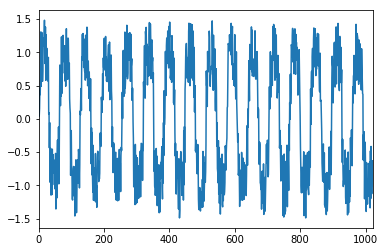

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# DFT of example signal

y = np.loadtxt("pitch.txt", float)

# plotting the original signal: wavelike shape with noise
plt.plot(y)
plt.xlim(0,1024)
plt.show()

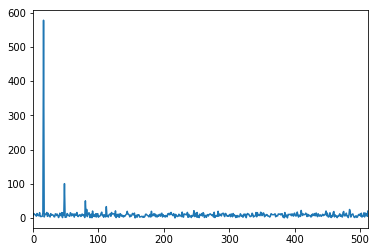

In [11]:
# performing the DFT with SciPy

from scipy.fftpack import fft, ifft

c = fft(y)

# plotting absolute value of Fourier coefficients
# the coefficients are in general complex!
plt.plot(np.abs(c))
plt.xlim(0,512)       # the second half of the interval is just mirrored (because the signal is a real function)
plt.show()

In [12]:
# checking inverse FFT

yinv = ifft(c)
np.isclose(yinv, y).any()   # .any() means for all values of vector

True

/home/olga/.virtualenvs/v3_newlibs/lib/python3.4/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


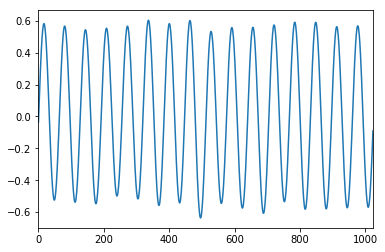

In [14]:
# removing secondary peaks -> denoising

cmod = c
cmod[20:1005] = 0   # removed most of the coefficients between big peaks
ymod = ifft(cmod)

plt.plot(ymod)
plt.xlim(0,1024)
plt.show()

### 2.5.7 Relationship between discrete and continuous transforms

If we want to approximate continuous transforms we need the positions $t_n$ and $\omega_k$:

- time $t_n = n\Delta = n\frac{T}{N}$
- frequency $\omega_k = \frac{2\pi}{\Delta N}k = \frac{2\pi}{T}k$
- the function values $f(t_n)$ will be approximated by the $y_n$
- the Fourier transform function values $\tilde{f}(\omega_k)$ will be approximated by the $\Delta c_k = T\gamma_k$
- note that the order in which the Fourier coefficients are stored numerically is different!

#### Example: Gaussian

The Fourier transform of a Gaussian is again a Gaussian:

$$
\begin{align*}
f(t) & = e^{-t^2}\\
\tilde{f}(\omega) & = \sqrt{\pi}e^{-\frac{\omega^2}{4}}
\end{align*}
$$

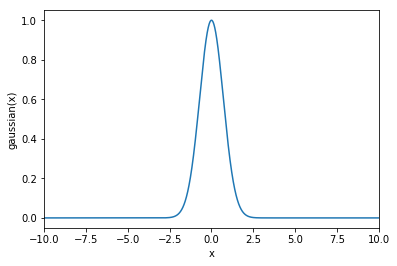

In [20]:
def gaussian(x):
    return np.exp(-x*x)

def ftGaussian(omega):
    return np.sqrt(np.pi)*np.exp(-omega*omega/4)

xmax = 10
dx = 0.001
xGauss = np.arange(-xmax,xmax,dx)
yGauss = gaussian(xGauss)

plt.plot(xGauss, yGauss)
plt.xlim(-xmax,xmax)
plt.xlabel("x")
plt.ylabel("gaussian(x)")
plt.show()

In [22]:
from scipy.fftpack import fft, fftfreq

fftGauss = fft(yGauss)

print("Is the imaginary part close to zero: ", np.isclose(np.imag(fftGauss), 0).any())

# you could also use rfft for real valued input functions, but the output format is different!
# see here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.fftpack.rfft.html

Is the imaginary part close to zero:  True


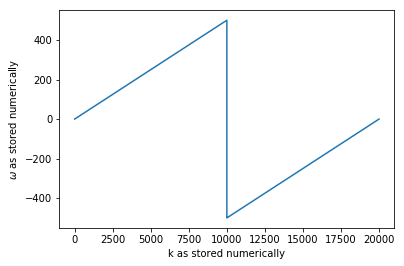

In [11]:
# the values of the frequencies

# defined manually
N = len(xGauss)
dFreq = 2*np.pi/dx/N
freqMax = dFreq*N/2
freqGauss = np.arange(-freqMax,freqMax,dFreq)

# with the fftfreq routine (note the order!)
freqGauss2 = fftfreq(N, dx)
plt.plot(freqGauss2)
plt.xlabel("k as stored numerically")
plt.ylabel(r"$\omega$ as stored numerically")
plt.show()

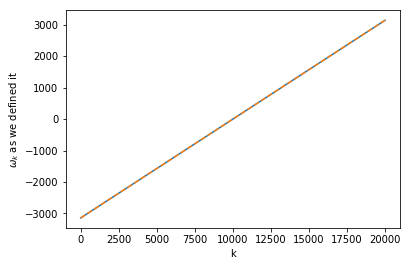

In [12]:
# you can shift the frequencies to be in the correct order like this:
from scipy.fftpack import fftshift, ifftshift

freqGauss2 = fftshift(fftfreq(N, dx))

plt.plot(2*np.pi*freqGauss2)          # we also need to include a factor of 2pi
plt.plot(freqGauss, "--")             # compare with manual definition
plt.xlabel("k")
plt.ylabel(r"$\omega_k$ as we defined it")
plt.show()

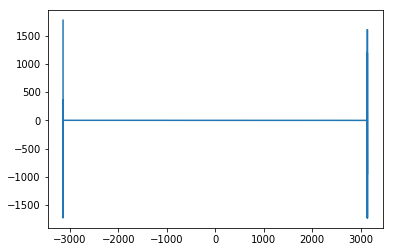

In [17]:
plt.plot(2*np.pi*freqGauss2, np.real(fftGauss))  
plt.show()

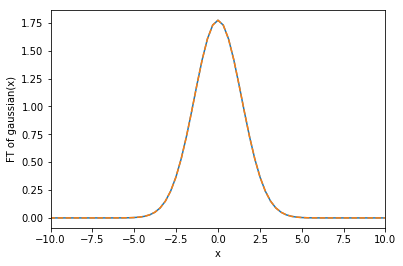

In [18]:
# and you can do the same shifts with the actual FFT

fftGauss = fftshift( fft( ifftshift(yGauss) ) )

# note that to recover the continuous FT you need to also multiply by the time step:

ftNumerical = np.real(dx*fftGauss)

plt.plot(freqGauss, ftNumerical)
plt.plot(freqGauss, ftGaussian(freqGauss), "--")
plt.xlim(-10,10)
plt.xlabel("x")
plt.ylabel("FT of gaussian(x)")
plt.show()

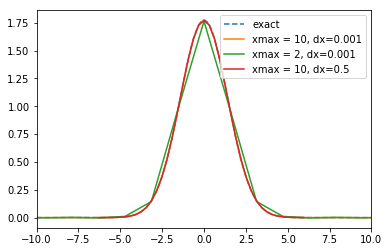

In [19]:
# How does our approximation depend on dx or N?
# How does our approximation depend on xmax?

def myFFT(xmax, dx):
    
    xGauss = np.arange(-xmax,xmax,dx)
    yGauss = gaussian(xGauss)
    
    N = len(xGauss)
    dFreq = 2*np.pi/dx/N
    freqMax = dFreq*N/2
    freqGauss = np.arange(-freqMax,freqMax,dFreq)

    fftGauss = fftshift( fft( ifftshift(yGauss) ) )

    ftNumerical = np.real(dx*fftGauss)

    return freqGauss, ftNumerical

previousExample = myFFT(10,0.001)
smallerXmax = myFFT(2,0.001)       # worse resolution (smaller dFreq)
smallerN = myFFT(10,0.5)           # smaller frequency range (freqMax)

omegaForPlot = np.arange(-10,10,0.001)
plt.plot(omegaForPlot, ftGaussian(omegaForPlot), "--", label = "exact")
plt.plot(previousExample[0], previousExample[1], label = "xmax = 10, dx=0.001")
plt.plot(smallerXmax[0], smallerXmax[1], label = "xmax = 2, dx=0.001")
plt.plot(smallerN[0], smallerN[1], label = "xmax = 10, dx=0.5")
plt.legend(loc = "upper right")
plt.xlim(-10,10)
plt.show()

### 2.5.8 Error sources

- we cannot know anything about the values $f(t)$ **between the samples** $y_n = f(t_n)$
- this is not a problem if the function is sufficiently smooth
- if we want to recover the continuous Fourier transform: need to take sufficiently dense grid
- function not periodic: need to take sufficiently large interval

- [Gibbs phenomenon](https://en.wikipedia.org/wiki/Gibbs_phenomenon): Fourier transform shows oscillations at a jump discontinuity
- this is particularly dangerous if your finite sampling resolution introduces jumps

#### Example: image compression

- uses 2D Fourier transform (same as 1D, but repeated for each dimension)
- JPEG compression typically uses discrete cosine transform (DCT)
- first encode color and brightness
- reduce color resolution to which the eye is less sensitive
- split image in 8x8 pixel blocks => DCT on both color and brightness components
- lower accuracy or remove high-frequency brightness components to which the eye is less sensitive
- compress remaining data for all 8x8 blocks with a lossless algorithm
- this last step is reversible (discarding components is not)
- similar for videos (MPEG compression) and music (MP3 compression)